In [1]:
import numpy
import matplotlib.patches as patches
from matplotlib import colors
import mitsuba as mi
mi.set_variant("cuda_ad_rgb")
import drjit as dr
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
from matplotlib.patches import Polygon
from PDE2D.Coefficient import *
from PDE2D.utils import *
from PDE2D.BoundaryShape import *
from PDE2D.Solver import *
import matplotlib.patches as patches

In [2]:

box_length = 2.1
box_center = [0,0]
bbox_sdf = [[box_center[0] - box_length/2, box_center[1] - box_length/2],
        [box_center[0] + box_length/2, box_center[1] + box_length/2]]

bbox = [[box_center[0] -  box_length/2, box_center[1] - box_length/2],
        [box_center[0] +  box_length/2, box_center[1] +  box_length/2]]

resolution = [1024, 1024]
upsample = 1


In [3]:

sdf_array1 = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

sdf_array2 = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1,-1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1,-1, 1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1,-1,-1,-1,-1,-1,-1,-1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [4]:
sdf_array = sdf_array2
sdf_array = sdf_array.repeat(upsample, axis = 0).repeat(upsample, axis = 1)
#sdf_array = gaussian_filter(sdf_array, sigma = .1).squeeze();
sdf1 = SDFGrid(tensor_np= sdf_array, box_length=box_length, box_center=box_center, epsilon = 1e-5, redistance = True, high_res=2048)
sdf2 = SDFGrid(tensor_np= sdf_array, box_length=box_length, box_center=box_center, epsilon = 1e-5, redistance = True, high_res=256)

In [5]:
bpoints1, _, _ = sdf1.create_boundary_points(distance = 0, res = 64, spp = 1, discrete_points = True)

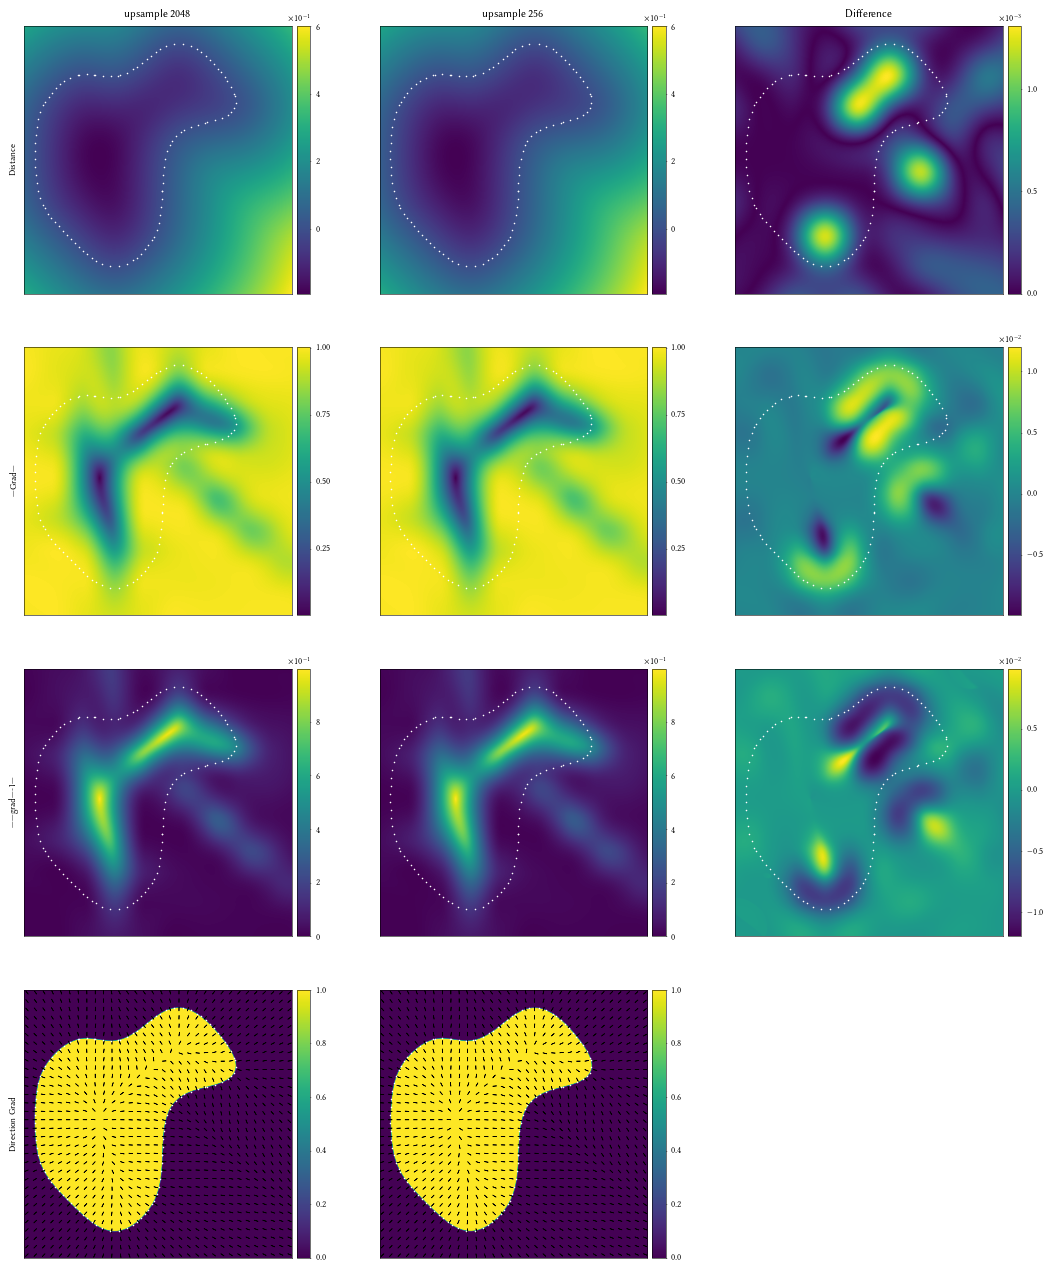

In [6]:
bbox1 = [[-0.7,-0.7],[0.4,0.4]]
visualize1(bbox1, resolution, sdf1, sdf2, bpoints = bpoints1, name1 = f"upsample 2048", name2 = f"upsample 256")

/home/ekrem/repos/MC-PDE3D/PDE2D/BoundaryShape/sdf_utils.py:298: UserWarning: The following kwargs were not used by contour: 'lw'
  ax1.contour(X, Y, d, colors = ["white"], lw = 5, levels = np.array([0]))
/home/ekrem/repos/MC-PDE3D/PDE2D/BoundaryShape/sdf_utils.py:299: UserWarning: The following kwargs were not used by contour: 'lw'
  ax2.contour(X, Y, d, colors = ["white"], lw = 5, levels = np.array([0]))


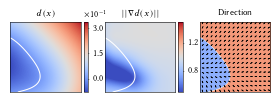

In [7]:
bbox2 = [[-0.0,-0.0],[0.4,0.4]]
visualize_grad(sdf1, bbox2, resolution = resolution, bpoints = bpoints1, range = 5e-1, res_angle = 16, norm = True)

In [8]:
def visualize2(wos, bbox, curvature_distance = 0.0, 
               resolution = [1024, 1024], num_points = 10, step = 0.03, spp = 18):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (12,12))
    wos.input.shape.sketch_image(ax1, bbox, resolution)
    points_polyline = wos.input.shape.in_boundaries[0].get_boundary_polyline(step = step)
    sketch_points = wos.input.shape.in_boundaries[0].sketch_boundary_polyline(ax1, bbox, resolution)
    sketch_points_plot = sketch_points[::num_points]
    ax1.scatter(sketch_points_plot[0,0], sketch_points_plot[0,1], color = "red")
    ax1.scatter(sketch_points_plot[1:,0], sketch_points_plot[1:,1], color = "green")

    indices = np.arange(dr.width(wos.input.shape.in_boundaries[0].polyline))
    normal = wos.input.shape.in_boundaries[0].get_normal(wos.input.shape.in_boundaries[0].polyline)
    points_curvature = wos.input.shape.in_boundaries[0].polyline  + curvature_distance * normal
    curvature = wos.input.shape.in_boundaries[0].compute_curvature(points_curvature).numpy()
    ax2.plot(indices, curvature, label = f"Curvature")

    spp = 2 ** spp
    distances = [1e-2,1e-1,2e-1]
    points_normalders = []
    range_all = [np.nan, -np.nan]
    for distance in distances:
        normal = wos.input.shape.in_boundaries[0].get_normal(wos.input.shape.in_boundaries[0].polyline)
        points_normal_der = wos.input.shape.in_boundaries[0].polyline  + distance * normal
        points_normalders.append(points_normal_der)
        points_polyline = dr.repeat(points_normal_der, spp)
        normals = dr.repeat(normal, spp)
        L, _ = wos.solve(conf_numbers = [mi.UInt32(0)], points_in = points_polyline, derivative_dir = normals)
        result = dr.block_sum(L, spp) / spp
        result = result.numpy()
        
        result_corrected = result * (1 - distance * curvature)

        range_ = get_common_range(result_corrected, result)
        range_all = get_common_range(np.array(range_all), range_)
        
        ax3.plot(indices, result[0], label = f"d = {distance}")
        ax4.plot(indices, result_corrected[0], label = f"d = {distance}")
        
    range_all[0] -= 1
    range_all[1] += 1
    ax3.set_ylim(range_all)
    ax4.set_ylim(range_all)

    #ax2.legend()
    ax3.legend()
    ax4.legend()

    ax2.axhline(0, lw = 0.5, color = "black")
    ax3.axhline(0, lw = 0.5, color = "black")
    ax4.axhline(0, lw = 0.5, color = "black")
    
    ax2.axvline(0, lw = 1, color = "red")
    ax3.axvline(0, lw = 1, color = "red")
    ax4.axvline(0, lw = 1, color = "red")
    ax2.set_xticks([])
    ax3.set_xticks([])
    ax4.set_xticks([])
    
    ax2.set_xlim([-1, sketch_points.shape[0]])
    ax3.set_xlim([-1, sketch_points.shape[0]])
    ax4.set_xlim([-1, sketch_points.shape[0]])

    for i in range(num_points, sketch_points.shape[0], num_points):
        ax2.axvline(i, lw = 1, color = "green")
        ax3.axvline(i, lw = 1, color = "green")
        ax4.axvline(i, lw = 1, color = "green")
        
    ax1.set_title("Shape")
    ax3.set_title("Normal Derivatives")
    ax2.set_title(f"Curvatures")
    ax4.set_title("Normal Derivatives, Corrected")
    return result[0], result_corrected[0]

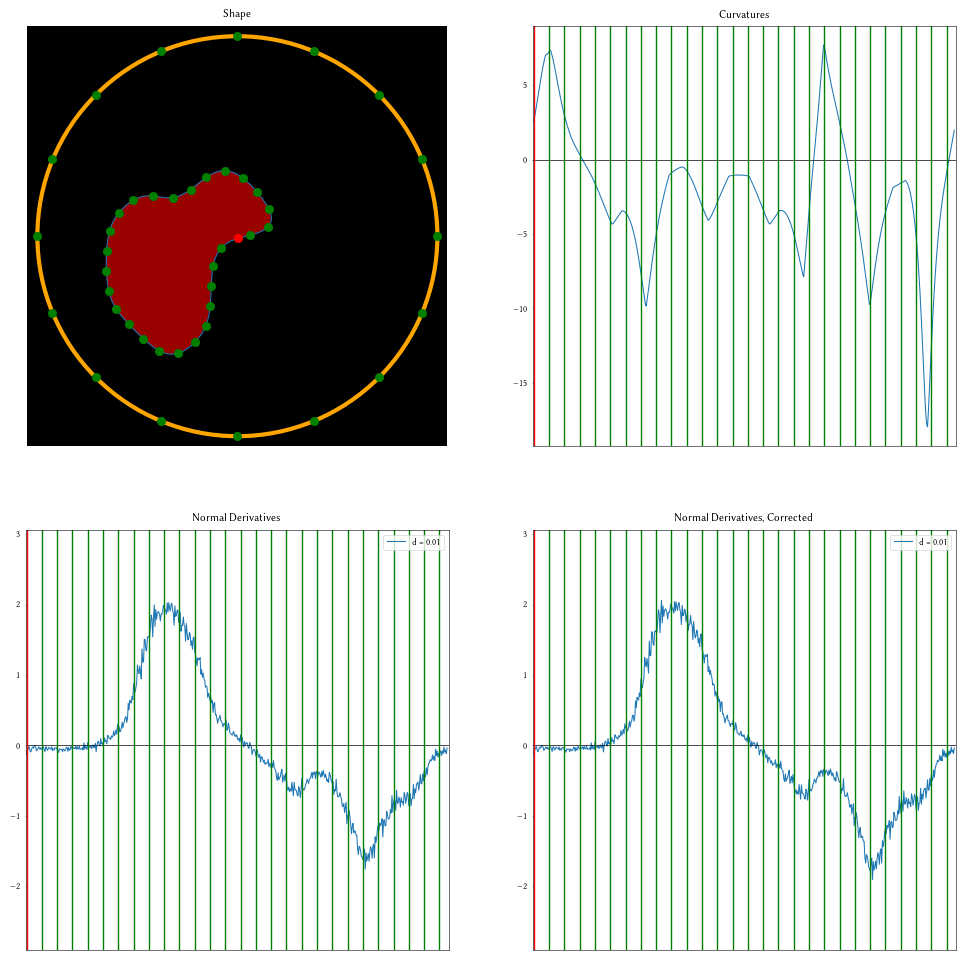

In [9]:
out_boundary = CircleWithElectrodes(radius = 1, injection_confs = [[0,10], [1,2]], is_delta = True)
shape = BoundaryWithDirichlets(out_boundary, [sdf1], dirichlet_values = [[0]])
data_holder = DataHolder(shape)
wos = WostConstant(input=data_holder)
result, result_corrected = visualize2(wos, bbox, num_points=20, step = 0.005, spp = 15)

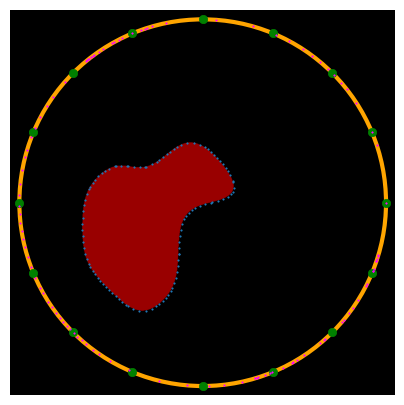

In [17]:
normals = sdf1.get_normal(bpoints1)
bpoints1 += normals * 1e-3
bi = BoundaryInfo(bpoints1, False)
bi.bn = normals
ri = wos.input.shape.ray_intersect(bi, normals)
fig, ax = plt.subplots(1,1, figsize = (5,5))
wos.input.shape.sketch_image(ax, bbox, resolution)
bpoints_sketch = point2sketch(bpoints1, bbox, resolution).numpy()
intpoints_sketch = point2sketch(ri.intersected, bbox, resolution).numpy()
ax.scatter(bpoints_sketch[0], bpoints_sketch[1], s = 1)
ax.scatter(intpoints_sketch[0], intpoints_sketch[1], s = 1, color = "magenta")

In [18]:
normal_der, _ = wos.create_normal_derivative(res = 512, spp = 1024, distance = 0.1, conf_numbers = [mi.UInt32(0), mi.UInt32(1)])

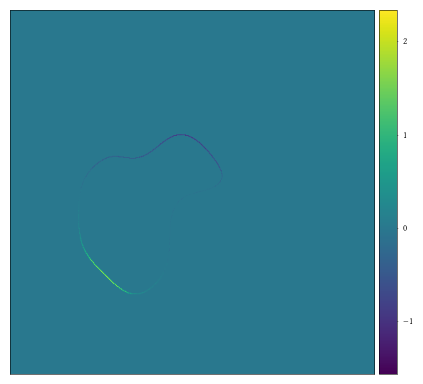

In [19]:
fig, ax = plt.subplots(1,1,figsize = (5,5))
plot_image(normal_der[0], ax)